# Método de Euler

In [1]:
def euler(vi0, hi0, t, dt):
    
    v = [vi0]
    h = [hi0]

    for i in range(int(t / dt)):
        h.append(h[i] + dt * (0.311 - 0.0624 * v[i]))
        v.append(v[i] + dt * (0.0107 * h[i] - 0.00205 * v[i] ** 2))
        
    return v, h

# Método de Runge-Kutta de Quarta Ordem

In [2]:
def runge_kutta_4(vi0, hi0, t, dt):
    
    v = [vi0]
    h = [hi0]

    for i in range(int(t / dt)):
        k1_v = (0.0107 * h[i] - 0.00205 * v[i] ** 2)
        k1_h = (0.311 - 0.0624 * v[i])

        k2_v = (0.0107 * (h[i] + 0.5 * dt) - 0.00205 * (v[i] + 0.5 * dt * k1_v) ** 2)
        k2_h = (0.311 - 0.0624 * (v[i] + 0.5 * dt))

        k3_v = (0.0107 * (h[i] + 0.5 * dt) - 0.00205 * (v[i] + 0.5 * dt * k2_v) ** 2)
        k3_h = (0.311 - 0.0624 * (v[i] + 0.5 * dt))

        k4_v = (0.0107 * (h[i] + dt) - 0.00205 * (v[i] * k3_v) ** 2)
        k4_h = (0.311 - 0.0624 * (v[i] + dt))

        h.append(h[i] + (dt/6) * (k1_h + 2*k2_h + 2*k3_h + k4_h))
        v.append(v[i] + (dt/6) * (k1_v + 2*k2_v + 2*k3_v + k4_v))
        
    return v, h

# Função Comparação dos Erros

In [3]:
def calculo_erros(valores_rk4, valores_euler):
    erros_absolutos_vi = []
    erros_relativos_vi = []
    erros_absolutos_hi = []
    erros_relativos_hi = []

    for i in range(len(valores_rk4[0])):
        rk4_vi = valores_rk4[0][i]
        rk4_hi = valores_rk4[1][i]
        euler_vi = valores_euler[0][i]
        euler_hi = valores_euler[1][i]

        erro_absoluto_vi = abs(rk4_vi - euler_vi)
        erro_absoluto_hi = abs(rk4_hi - euler_hi)

        erro_relativo_vi = erro_absoluto_vi / (abs(rk4_vi) + 1e-8)
        erro_relativo_hi = erro_absoluto_hi / (abs(rk4_hi) + 1e-8)

        erros_absolutos_vi.append(erro_absoluto_vi)
        erros_relativos_vi.append(erro_relativo_vi)
        erros_absolutos_hi.append(erro_absoluto_hi)
        erros_relativos_hi.append(erro_relativo_hi)

    return erros_absolutos_vi, erros_relativos_vi, erros_absolutos_hi, erros_relativos_hi


# Função Plotagem dos Dados

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plotagem(rk4, euler, erros):

    tempo = np.arange(0, len(rk4[0]))

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    axes[0, 0].plot(tempo, rk4[0], label='Runge-Kutta 4', color='blue')
    axes[0, 0].plot(tempo, euler[0], label='Euler', color='red')
    axes[0, 0].set_ylabel('Vazão (m³/s)')
    axes[0, 0].set_xlabel('Tempo (s)')
    axes[0, 0].set_title('Runge-Kutta 4 X Euler para Vazão')
    axes[0, 0].legend()

    axes[0, 1].plot(tempo, rk4[1], label='Runge-Kutta 4', color='blue')
    axes[0, 1].plot(tempo, euler[1], label='Euler', color='red')
    axes[0, 1].set_ylabel('Altura (m)')
    axes[0, 1].set_xlabel('Tempo (s)')
    axes[0, 1].set_title('Runge-Kutta 4 X Euler para Altura')
    axes[0, 1].legend()

    axes[1, 0].plot(tempo, erros[0], label='Erro Absoluto (v)', color='purple')
    axes[1, 0].plot(tempo, erros[2], label='Erro Absoluto (h)', color='brown')
    axes[1, 0].set_ylabel('Erro Absoluto')
    axes[1, 0].set_xlabel('Tempo (s)')
    axes[1, 0].set_title('Erros Absolutos')
    axes[1, 0].legend()

    axes[1, 1].plot(tempo, erros[1], label='Erro Relativo (v)', color='green')
    axes[1, 1].plot(tempo, erros[3], label='Erro Relativo (h)', color='orange')
    axes[1, 1].set_ylabel('Erro Relativo')
    axes[1, 1].set_xlabel('Tempo (s)')
    axes[1, 1].set_title('Erros Relativos')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()


# Execução dos Métodos e Plotagem

In [5]:
# Execução do Método de Euler
valores_euler = euler(3.4, 2.05, 900, 1)

In [6]:
# Execução do Método de Runge-Kutta ordem 4
valores_rk4 = runge_kutta_4(3.4, 2.05, 900, 1)

In [7]:
# Execução do Cálculo dos Erros entre os métodos
erros = calculo_erros(valores_rk4, valores_euler)

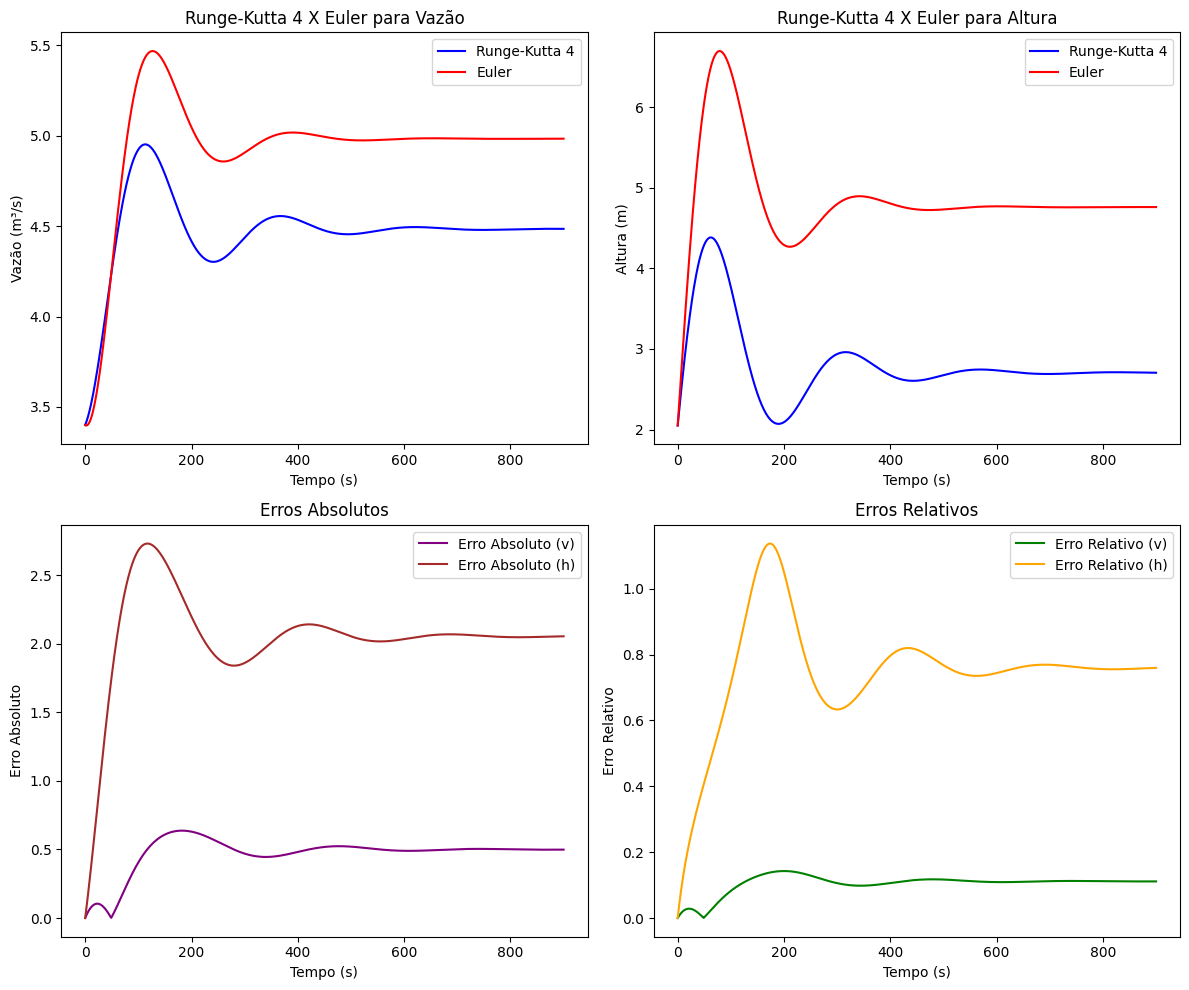

In [8]:
# Plotagem Final dos Resultados
plotagem(valores_rk4, valores_euler, erros)

# Extra: Comparação do tempo de execução dos Algoritmos

In [9]:
# Comparação entre o tempo de Execução dos métodos
import time

t1 = time.time()
valores_euler = euler(3.4, 2.05, 900, 1)
tf1 = time.time()
tempo1 = tf1 - t1

t2 = time.time()
valores_rk4 = runge_kutta_4(3.4, 2.05, 900, 1)
tf2 = time.time()
tempo2 = tf2 - t2

print(f'''Euler: {tempo1} segundos \nRk4: {tempo2} segundos''')

Euler: 0.0 segundos 
Rk4: 0.0185396671295166 segundos
